In [25]:
finetune_per_token = {
    'Davinci': 0.03,
    'Ada': 0.0004,
    'Babbage': 0.0006,
    'Curie': 0.003
}

tuned_per_token ={
    'Davinci': 0.12,
    'Ada': 0.0061,
    'Babbage': 0.0024,
    'Curie': 0.012
}

api_per_token = {
    'GPT 3.5': 0.002,
    'Ada': 0.0004,
    'Babbage': 0.0005,
    'Curie': 0.002,
    'Davinci': .02
}

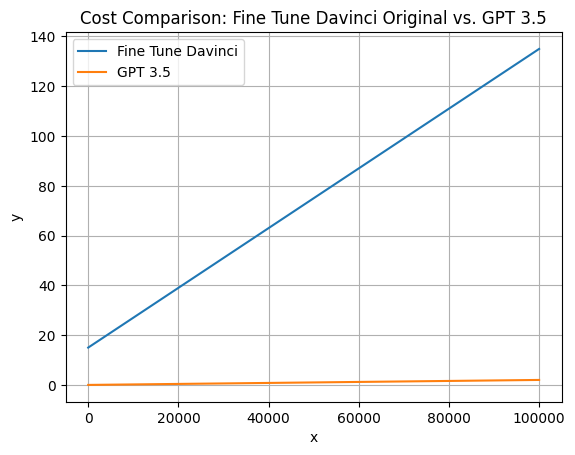

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fine_tune_size = 50000
fine_tune_model = 'Davinci'
api_model = 'GPT 3.5'
max_graph = 100000
graph_step = (max_graph/10)

# Define the equations
def equation1(x):
    return ((finetune_per_token[fine_tune_model]) * fine_tune_size)/100 + ((tuned_per_token[fine_tune_model]) * x)/100

def equation2(x):
    return (api_per_token[api_model] * x)/100

# Generate x values
x = np.linspace(0, max_graph,int(graph_step))  # Adjust the range as per your requirement

# Calculate y values for both equations
y1 = equation1(x)
y2 = equation2(x)

# Plot the graph
plt.plot(x, y1, label='Fine Tune Davinci')
plt.plot(x, y2, label='GPT 3.5')
plt.title('Cost Comparison: Fine Tune Davinci Original vs. GPT 3.5')
plt.xlabel('Number of Tokens')
plt.ylabel('Cost in $')
plt.legend()
plt.grid(True)
plt.show()


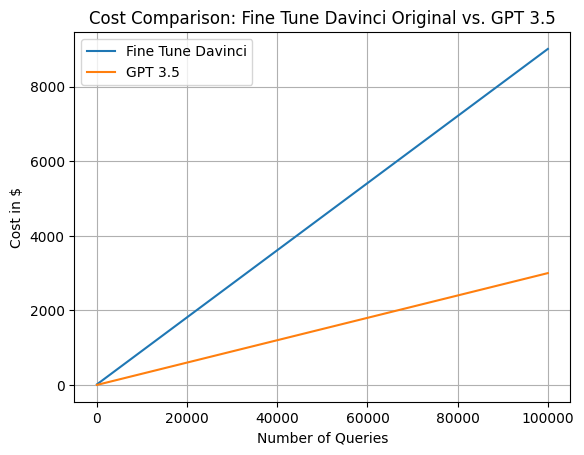

In [31]:
import matplotlib.pyplot as plt
import numpy as np


qadjust = 900
avg_query_len = 300
total_len = qadjust+avg_query_len
fine_tune_size = 50000
fine_tune_model = 'Davinci'
api_model = 'GPT 3.5'
max_graph = 100000
graph_step = (max_graph/10)

finetune_per_query_cost = ((finetune_per_token[fine_tune_model] * avg_query_len)/100)
finetune_startup = ((finetune_per_token[fine_tune_model]) * fine_tune_size)/100
fsp_per_query_cost = ((api_per_token[api_model]  * total_len)/100)

# Define the equations
def equation1(x):
    return finetune_startup + finetune_per_query_cost*x

def equation2(x):
    return finetune_per_token[fine_tune_model] * x

# Generate x values
x = np.linspace(0, max_graph,int(graph_step))  # Adjust the range as per your requirement

# Calculate y values for both equations
y1 = equation1(x)
y2 = equation2(x)

# Plot the graph
plt.plot(x, y1, label=f'Fine Tune {fine_tune_model}')
plt.plot(x, y2, label=api_model)
plt.title(f'Cost Comparison: Fine Tune {fine_tune_model} Original vs. {api_model}')
plt.xlabel('Number of Queries')
plt.ylabel('Cost in $')
plt.legend()
plt.grid(True)
plt.show()